# Adagrad
Momentum and Nesterov momentum update all components of $x$ with the same learning rate. The *adaptive subgradient* method, or *Adagrad*, adapts a learning rate for each component of $x$. Adagrad dulls the influence of parameters with consistently high gradients, thereby increasing the influence of parameters with frequent updates.

The Adagrad update step is :
\begin{align}
      x_i^{(k+1)} = x_i^{(k)} - \frac{\alpha}{\epsilon + \sqrt{s_i^{(k)}}}*g_i^{(k)}
 \end{align}

 where $s^{(k)}$ is a vector whose $i^{th}$ entry is the sum of the squares of the partials, with respect to $x_i$, up to time step $k$,
 \begin{align}
      s_i^{(k)} = \sum_{j=1}^{k}(g_i^{(j)})^2
 \end{align}
 where $\epsilon$ is a small value, on the order of $1* 10^{-8}$, to prevent division by zero. Adagrad is far less sensitive to the learning rate parameter $\alpha$. The learning rate parameter is typically set to a default value of 0.01. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

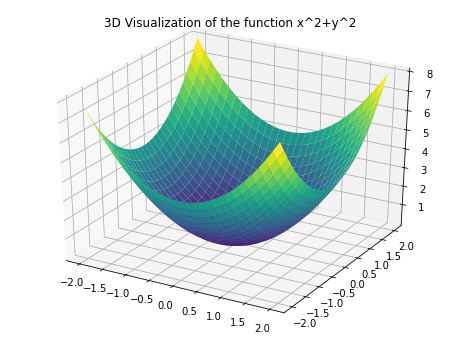

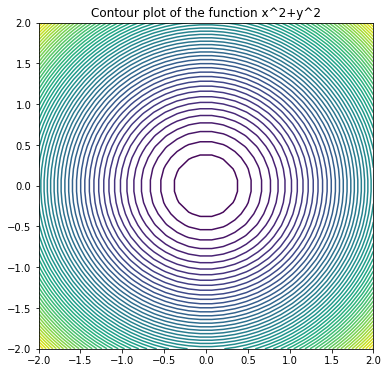

In [ ]:
# Visualize the function (x**2+y**2)

x1 = np.linspace(-2,2,30)
x2 = np.linspace(-2,2,30)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = X**2 + Y**2
figure = plt.figure(figsize=(8,6))
axis = figure.gca(projection='3d')
plt.title("3D Visualization of the function x^2+y^2")
axis.plot_surface(X, Y, Z, cmap='viridis')

plt.show()
plt.figure(figsize=(6,6))
plt.title("Contour plot of the function x^2+y^2")
plt.contour(X,Y,Z,55,cmap='viridis')
plt.show()



In [ ]:
def fun(x,a):
  pow = a
  if pow == 0:
    return x[0]**2 + x[1]**2
   
  else:
    h = 0.00001
    x1 = np.array([x[0]+h,x[1]])
    x2 = np.array([x[0],x[1]+h])
    # The gradient Vector
    g = np.array([(fun(x1,0)-fun(x,0))/h,(fun(x2,0)-fun(x,0))/h])
    return g

In [ ]:
def adagrad(x_init,alpha,eps,eps1,inter):
  
  iter = 0

  # Initializing lists to append values of x's, function output, gradients, sum of gradients and decreasing learning 
  # rate.
  arr_x = [] ; arr_f = [] ; arr_g = [] ; arr_s = []; arr_lr = []
  
  # assign values to x, fun(x), and gradient(x)
  x, f ,g = x_init,fun(x_init,0),fun(x_init,1)

  # Normalized gradient direction : d
  d = np.array(g/np.linalg.norm(g))

  # Appending the values of our first iteration to the created lists.
  arr_x.append(x); arr_f.append(f); arr_g.append(g)
  
  # Check if our starting point is minimum of the function 
  if (np.linalg.norm(g)==0):
    print(" The min value of the function is:",f, "for value  of x:",x)
    return x
  else:
    # Start of the while loop, which will be executed until our condition is met
    for i in range(inter):

      iter+=1
      # update statement "sum of the squares of the gradients upto g^(k)" of Adagrad
      e = np.square(arr_g)
      e = e.sum(axis=1)         
      s = np.sum(e)
  
      # Recording the decreasing learning rate, for demonstration in graph
      arr_s.append(np.sqrt(s)); arr_lr.append((lr/(eps1 + np.sqrt(s))))
        
      # Step to update value of x, in the decreasing direction of gradient and a decreasing multiple of learning rate.
      x = x - lr/(eps1 + np.sqrt(s))*arr_g[-1]
     
      #recalculate fun(x) and grad(x), based on new values of x
      f, g = fun(x,0) , fun(x,1)

      # normalized gradient direction
      d = np.array(g/np.linalg.norm(g))

      # append the list with new values of x, fun(x) and grad(x) 
      arr_x.append(x) ; arr_f.append(f); arr_g.append(g)
      
    print("iter",iter,"f:",f )
    
    return (arr_x,arr_f,arr_s,arr_lr,arr_g)

In [ ]:
x = [2,2]
inter = 10000
lr = 0.01
eps = 1e-4
eps1 = 1e-8
arr_x,arr_f,arr_s,arr_lr,arr_g = adagrad(x,lr,eps,eps1,inter)
print("The minimum point of the function:",arr_x[-1])

iter 10000 f: 1.297147588407563
The minimum point of the function: [0.80534079 0.80534079]


One drawback of the Adagrad, is that the components of (sum of the gradients) are strickly non-decreasing. The accumulated sum causes the effective learning rate to decrease during training, often becoming infitesimally small before convergence. 

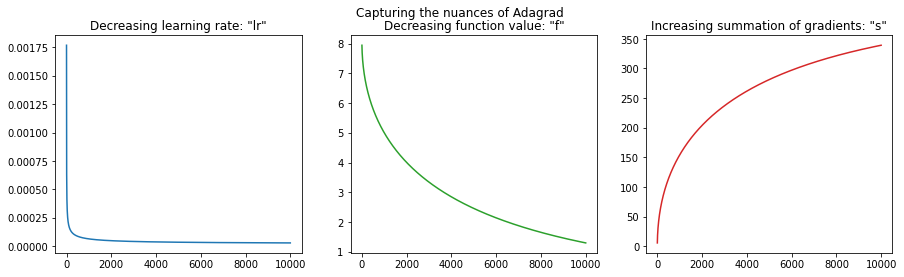

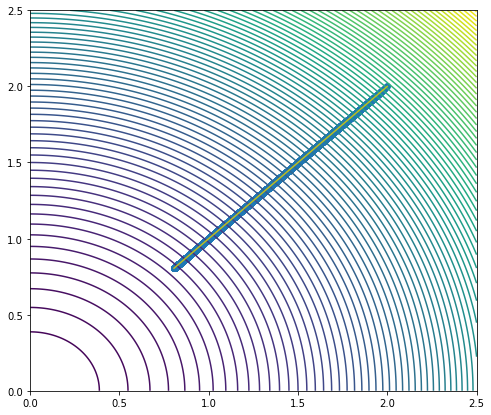

In [ ]:
 # Subplots to visualize the decreasing learning rate, decreasing function value and non-decreasing gradient sum.
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
x, y, lr, f = range(len(arr_s)) ,arr_s, arr_lr, arr_f[1:]
fig.suptitle('Capturing the nuances of Adagrad')
ax1.plot(x, lr,'tab:blue')
ax1.set_title('Decreasing learning rate: "lr"')
ax2.plot(x, f,'tab:green')
ax2.set_title('Decreasing function value: "f"')
ax3.plot(x, y, 'tab:red')
ax3.set_title('Increasing summation of gradients: "s"')

x1, x2 = np.linspace(0,2.5,500), np.linspace(0,2.5,500)
arr = pd.DataFrame(arr_x)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = X**2 + Y**2
a,b  = arr[0],arr[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()

# RMS
RMS prop extends Adagrad to avoid the effect of a monotonically decreasing learning rate. RMS prop maintains a decaying average of squared gradients. This average is updated accordingly:

\begin{align}
      \hat{s}^{(k+1)} = \gamma \hat{s}^{(k+1)} - (1-\gamma)(g^{(k)} * g^{(k)})
 \end{align}

 where the decay $\gamma \in [0,1]$ is close to 0.9.
 The decaying average of past sqaured gradients can be substituted into RMS prop update equation:

\begin{align}
        x_i^{(k+1)} = x_i^{(k)} - \frac{\alpha}{\epsilon + \sqrt{\hat{s_i}^{(k)}}}*g_i^{(k)}
 \end{align}
 \begin{align}
            = x_i^{(k)} - \frac{\alpha}{\epsilon + RMS(g_i)}*g_i^{(k)}
 \end{align}

In [ ]:
def RMS_prop(x_init,alpha,gamma,eps,eps1,inter):
  
  iter = 0

  # Initializing lists to append values of x's, function output, gradients, sum of gradients and decreasing learning 
  # rate.
  arr_x = [] ; arr_f = [] ; arr_g = [] ; arr_s = []; arr_lr = []
  
  # assign values to x, fun(x), and gradient(x)
  x, f ,g = x_init,fun(x_init,0),fun(x_init,1)

 
  # Normalized gradient direction : d
  d = np.array(g/np.linalg.norm(g))

  # Appending the values of our first iteration to the created lists.
  arr_x.append(x); arr_f.append(f); arr_g.append(g)
  s = np.zeros(len(x))
  s = gamma*s + (1-gamma)* np.dot(arr_g[-1],arr_g[-1])
  arr_s.append(s)
  arr_lr.append(lr/(eps1 + np.sqrt(s)))
  
  # Check if our starting point is minimum of the function 
  if (np.linalg.norm(g)==0):
    print(" The min value of the function is:",f, "for value  of x:",x)
    return x
  else:
    # Start of the while loop, which will be executed until our condition is met
    
    print(f)
    while abs(f) > eps:

      iter+=1
      # update statement "sum of the squares of the gradients upto g^(k)" of Adagrad
      

      #decaying average of squared gradients
      s = gamma*s + (1-gamma)* np.dot(arr_g[-1],arr_g[-1])
        
      # Step to update value of x, in the decreasing direction of gradient and a decreasing multiple of learning rate.
      #x = x - lr/(eps1 + np.sqrt(s))*arr_g[-1]
      x = x - lr/(eps1 + np.sqrt(s))*g
     
      #recalculate fun(x) and grad(x), based on new values of x
      f, g = fun(x,0) , fun(x,1)

      # append the list with new values of x, fun(x) and grad(x) 
      arr_x.append(x) ; arr_f.append(f); arr_g.append(g); arr_s.append(s); arr_lr.append(lr/(eps1 + np.sqrt(s)))
      
    print("iter",iter,"f:",f )
    
    return (arr_x,arr_f,arr_s,arr_lr,arr_g)

In [ ]:
x = [2,2]
#inter = 10000
gamma = 0.9
lr = 0.01
eps = 1e-4
eps1 = 1e-8
arr_x,arr_f,arr_s,arr_lr,arr_g = RMS_prop(x,lr,gamma,eps,eps1,inter)
print("The minimum point of the function:",arr_x[-1])

8
iter 316 f: 9.917668805573655e-05
The minimum point of the function: [0.0070419 0.0070419]


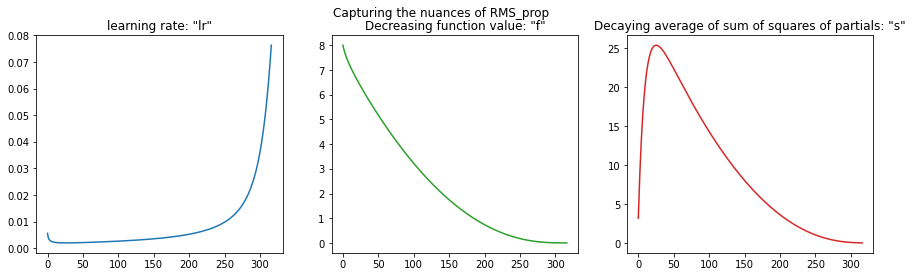

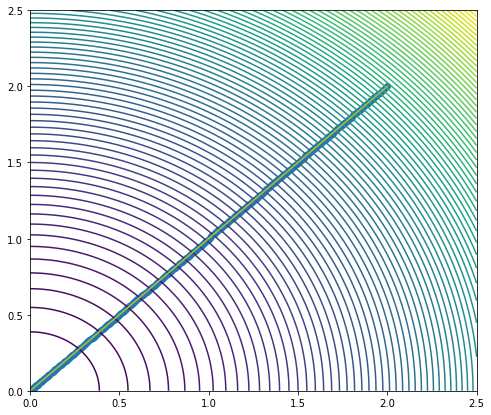

In [ ]:
 # Subplots to visualize the decreasing learning rate, decreasing function value and non-decreasing gradient sum.
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
x, y, lr, f = range(len(arr_s)) ,arr_s, arr_lr, arr_f
fig.suptitle('Capturing the nuances of RMS_prop')
ax1.plot(x, lr,'tab:blue')
ax1.set_title('learning rate: "lr"')
ax2.plot(x, f,'tab:green')
ax2.set_title('Decreasing function value: "f"')
ax3.plot(x, y, 'tab:red')
ax3.set_title('Decaying average of sum of squares of partials: "s"')

x1,x2,arr = np.linspace(0,2.5,500), np.linspace(0,2.5,500),pd.DataFrame(arr_x)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = X**2 + Y**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()

# Adadelta
Adadelta is another method for overcoming "Adagrad's Monotonically decreasing learning rate. We use exponentially decaying average of square updates. 

\begin{align}
        x_i^{(k+1)} = x_i^{(k)} - \frac{\text{RMS}(\triangle x_i)}{\epsilon + \text{RMS}(g_i)}*g_i^{(k)}
 \end{align}
 which eliminates the learning rate entirely.
 


In [ ]:
def adadelta(x_init,gamma,eps,eps1):
  
  iter = 0

  # Initializing lists to append values of x's, function output, gradients, sum of gradients and decreasing learning 
  # rate.
  arr_x = [] ; arr_f = [] ; arr_g = [] ; arr_s = []; arr_u = []
  
  # assign values to x, fun(x), and gradient(x)
  x, f ,g = x_init,fun(x_init,0),fun(x_init,1)

  # Appending the values of our first iteration to the created lists.
  arr_x.append(x); arr_f.append(f); arr_g.append(g)
  s, u  = np.zeros(len(x)),np.zeros(len(x))

  # Calculating the incremental value of s with a steady decay, exponential decaying average of square updates
  s = gamma*s + (1-gamma)* np.dot(arr_g[-1],arr_g[-1])
  
  # Initial value of decay initialized to 0, to prevent entirely decaying to zero
  del_x = np.zeros(len(x))
  print("del_x",del_x)
  u = gamma*u + (1-gamma)* np.dot(del_x,del_x)

  arr_s.append(s); arr_u.append(u)

  
  # Check if our starting point is minimum of the function 
  if (np.linalg.norm(g)==0):
    print(" The min value of the function is:",f, "for value  of x:",x)
    return x
  else:
    # Start of the while loop, which will be executed until our condition is met
    
    print(f)
    while abs(f) > eps:

      iter+=1
      
      x = x + del_x
      print(x)
      # update value of fun(x), gradient(x)
      f, g = fun(x,0) , fun(x,1)

      # Appending the values calculated in the previous 2 steps
      arr_x.append(x) ; arr_f.append(f); arr_g.append(g)
      

      # decay steps of RMS prop and Adadelta
      s = gamma*s + (1-gamma)* np.dot(arr_g[-1],arr_g[-1])
      del_x = - np.divide((np.sqrt(u) + eps1),(np.sqrt(s)+eps1)) * g
      print("del_x",del_x)
      u = gamma*u + (1-gamma)* np.dot(del_x,del_x)

      arr_s.append(s); arr_u.append(u)
   
      print("iter",iter,"f:",f )
    
    return (arr_x,arr_f,arr_s,arr_u)